<a href="https://colab.research.google.com/github/vm00328/vm00328_coursework_com2025/blob/master/COM2028_CW_vm00328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=dce26763f72a430bae506f10586aa1fd720e02876eea461403b1ba57e0510f06
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladislavmanolov","key":"5a9777f95a483af8cf3d3b1e156f046d"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'uos-com2028'

 99% 818M/827M [00:21<00:00, 39.2MB/s]
100% 827M/827M [00:21<00:00, 40.7MB/s]


In [5]:
! unzip uos-com2028.zip -d COM2028_Coursework

Streaming output truncated to the last 5000 lines.
  inflating: COM2028_Coursework/train/train/5499.jpg  
  inflating: COM2028_Coursework/train/train/55.jpg  
  inflating: COM2028_Coursework/train/train/550.jpg  
  inflating: COM2028_Coursework/train/train/5500.jpg  
  inflating: COM2028_Coursework/train/train/5501.jpg  
  inflating: COM2028_Coursework/train/train/5502.jpg  
  inflating: COM2028_Coursework/train/train/5503.jpg  
  inflating: COM2028_Coursework/train/train/5504.jpg  
  inflating: COM2028_Coursework/train/train/5505.jpg  
  inflating: COM2028_Coursework/train/train/5506.jpg  
  inflating: COM2028_Coursework/train/train/5507.jpg  
  inflating: COM2028_Coursework/train/train/5508.jpg  
  inflating: COM2028_Coursework/train/train/5509.jpg  
  inflating: COM2028_Coursework/train/train/551.jpg  
  inflating: COM2028_Coursework/train/train/5510.jpg  
  inflating: COM2028_Coursework/train/train/5511.jpg  
  inflating: COM2028_Coursework/train/train/5512.jpg  
  inflating: COM20

In [6]:
#Some necessary imports that are used throughout development
import keras
import numpy as np
from numpy.random import seed
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from cv2 import cv2

from keras.preprocessing.image import ImageDataGenerator

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from google.colab import files

%matplotlib inline

In [7]:
#Upload the data and make an array for the training dataset
from tqdm import tqdm
trained_data = [None] * 10270
savedIn = 'COM2028_Coursework/train/train'
for i in tqdm(os.listdir(savedIn)):
  path = os.path.join(savedIn,i)
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (64,64))
  img = img/255
  i = i[:-4]
  trained_data[int(i)] = np.array(img)
x_train = np.array(trained_data)

#Checking the shape of x_train to make sure everything is as expected
x_train.shape

100%|██████████| 10270/10270 [00:39<00:00, 261.38it/s]


(10270, 64, 64, 3)

In [8]:
#Uploading the data annd making an array for the testing dataset
tested_pics = [None] * 15009
savedIn = 'COM2028_Coursework/test/test'
for i in tqdm(os.listdir(savedIn)):
  path = os.path.join(savedIn,i)
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (64,64))
  img = img/255
  i = i[:-4]
  tested_pics[int(i)] = np.array(img)
x_test = np.array(tested_pics)

#Checking the shape of x_test to make sure everything is as expected
x_test.shape

100%|██████████| 15009/15009 [00:57<00:00, 259.60it/s]


(15009, 64, 64, 3)

In [9]:
example = "COM2028_Coursework/train.txt"
file = open(example, "r")
lines = file.readlines()
target = []
for line in lines:
  for n in line.split()[1:]:
    target.append(int(n))
y_train = np.array(target)
print(y_train)

[ 5 21 18 ...  7  7  7]


In [10]:
from keras. utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(10270, 23)

In [11]:
print(x_train.shape)

(10270, 64, 64, 3)


In [30]:
imgGenerator = ImageDataGenerator(
    shear_range = 0.25,
    zoom_range = 0.25,
)

imgGenerator.fit(x_train)

#Splitting the data into a training and testing set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42,test_size=0.02)

In [31]:
print('Training Data:')
print(x_train.shape)
print(y_train.shape)

print('Validation Data:')
print(x_val.shape)
print(y_val.shape)

Training Data:
(9862, 64, 64, 3)
(9862, 23)
Validation Data:
(202, 64, 64, 3)
(202, 23)


In [32]:
#Building the model
model = Sequential()
model.add(Convolution2D(64, kernel_size = 3, activation='relu', input_shape=(64,64,3)))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))

model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
#model.add(Dense(64, activation='relu'))

model.add(Convolution2D(128, kernel_size = 3, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(23, activation='softmax'))

In [33]:
#Setting the learning rate to a small value
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
accuracy = keras.metrics.CategoricalAccuracy()

#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Printing a summary of the model for vizualization purposes
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [34]:
#Fitting the model
my_model = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=150, batch_size=64)
#tf.convert_to_tensor()

Epoch 1/150
155/155 [==============================] - 4s 17ms/step - loss: 2.7634 - accuracy: 0.1722 - val_loss: 2.1957 - val_accuracy: 0.3416
Epoch 2/150
155/155 [==============================] - 2s 15ms/step - loss: 2.3490 - accuracy: 0.3114 - val_loss: 2.0016 - val_accuracy: 0.4208
Epoch 3/150
155/155 [==============================] - 2s 15ms/step - loss: 2.1392 - accuracy: 0.3617 - val_loss: 1.7714 - val_accuracy: 0.4604
Epoch 4/150
155/155 [==============================] - 2s 15ms/step - loss: 1.9806 - accuracy: 0.3997 - val_loss: 1.6254 - val_accuracy: 0.5050
Epoch 5/150
155/155 [==============================] - 2s 15ms/step - loss: 1.8180 - accuracy: 0.4572 - val_loss: 1.5742 - val_accuracy: 0.5545
Epoch 6/150
155/155 [==============================] - 2s 15ms/step - loss: 1.7141 - accuracy: 0.4745 - val_loss: 1.5172 - val_accuracy: 0.5941
Epoch 7/150
155/155 [==============================] - 2s 15ms/step - loss: 1.6437 - accuracy: 0.4995 - val_loss: 1.4133 - val_accuracy:

In [35]:
loss_and_metrics = model.evaluate(x_val,y_val, verbose=2)
print("Test Loss:", loss_and_metrics[0])
# Evaluating the model accuracy in percents
print("Model Accuracy:", loss_and_metrics[1] * 100, "%")

7/7 - 0s - loss: 0.9195 - accuracy: 0.7574
Test Loss: 0.9194666743278503
Model Accuracy: 75.74257254600525 %


In [36]:
# Making a prediction of the validation data
y_pred_val = model.predict(x_val)

y_pred_val = np.argmax(y_pred_val, axis=1)

In [37]:
print('Printing the first element of Y_test')
y_val[0]

Printing the first element of Y_test


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
#Returning max value's index on axis 1
y_val = np.argmax(y_val, axis=-1)

#Printing the first element of the new y_val
y_val[0]

7

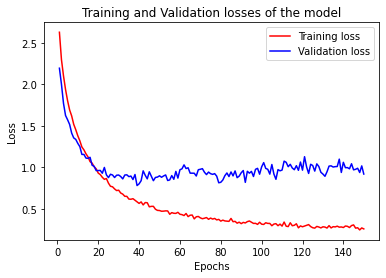

In [39]:
loss_train = my_model.history['loss']
loss_val = my_model.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train,'r', label='Training loss')
plt.plot(epochs, loss_val,'b', label='Validation loss')
plt.title('Training and Validation losses of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

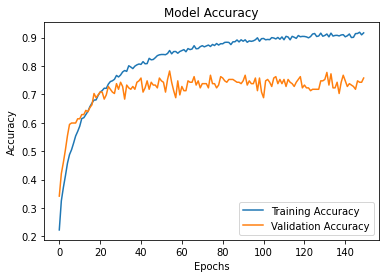

In [40]:
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [41]:
model.save('my_model.h5')

In [42]:
#Defining confusion matrix

cm = confusion_matrix(y_true=y_val, y_pred=y_pred_val)

TypeError: ignored

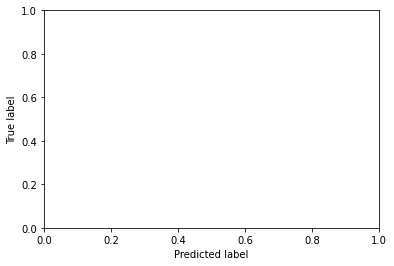

<Figure size 432x288 with 0 Axes>

In [23]:
#Creating a confusion matrix function for visualisation purposes

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
       print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white"if cm[i, j] > thresh else"black")
 
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_val, y_val)
np.set_printoptions(precision=2)

#Plotting the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

In [43]:
#Creating ther .csv file
col = pd.read_csv("COM2028_Coursework/submission_sample.csv")
#col["label"] = y_val
col.to_csv("COM2028_Coursework/vm00328_CW_AI.csv", index=False)
#df.to_csv('filename.csv') 
files.download('COM2028_Coursework/vm00328_CW_AI.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>